<a href="https://colab.research.google.com/github/Soichiro-Gardinner/Spanish-_Wine/blob/main/Copy_of_Spanish_Wine2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spanish Wine**
- **From:** Kaggle
- **By:** Oscar C.
- **Date:** 4/14/2023

In [1]:
# Import libraries:
import pandas as pd

In [2]:
# Read_Wine Data
S_wine = "/content/wines_SPA.csv"
df = pd.read_csv(S_wine)
df.head(20)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00000,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50000,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95000,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96000,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06000,Ribera Del Duero Red,5.0,3.0
5,Vega Sicilia,Unico,1998,4.8,1209,Espana,Ribera del Duero,490.00000,Ribera Del Duero Red,5.0,3.0
6,Vega Sicilia,Unico,2010,4.8,1201,Espana,Ribera del Duero,349.00000,Ribera Del Duero Red,5.0,3.0
7,Vega Sicilia,Unico,1995,4.8,926,Espana,Ribera del Duero,810.89000,Ribera Del Duero Red,5.0,3.0
8,Vega Sicilia,Unico Reserva Especial Edicion,2015,4.8,643,Espana,Ribera del Duero,345.00000,Ribera Del Duero Red,5.0,3.0
9,Vega Sicilia,Unico,2011,4.8,630,Espana,Ribera del Duero,315.00000,Ribera Del Duero Red,5.0,3.0


In [3]:
# Looking for nulls and Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [4]:
df.shape

(7500, 11)

**Delete unnecessary columns:**

In [5]:
# Delete unnecessary columns
df.drop(['winery', 'type'], axis=1, inplace=True)

**Delete duplicate rows:**


In [6]:
# Drop duplicates
df.drop_duplicates(inplace=True)

**Identify and address missing values:**

In [7]:
# Identify:
df.isna().sum()

wine             0
year             2
rating           0
num_reviews      0
country          0
region           0
price            0
body           271
acidity        271
dtype: int64

In [8]:
# Fill in missing values with the mode for the 'year' column
df['year'].fillna(df['year'].mode()[0], inplace=True)

# Replace missing values with the median for the 'body' and 'acidity' columns
df['body'].fillna(df['body'].median(), inplace=True)
df['acidity'].fillna(df['acidity'].median(), inplace=True)

In [9]:
# Identify again:
df.isna().sum()

wine           0
year           0
rating         0
num_reviews    0
country        0
region         0
price          0
body           0
acidity        0
dtype: int64

**Inconcistencies:**

In [10]:
for i in df.columns:
  print(f"\n{df[i].value_counts}")


<bound method IndexOpsMixin.value_counts of 0                 Tinto
1         Vina El Pison
2                 Unico
3                 Unico
4                 Unico
             ...       
2046    Finca Terrerazo
2047       Gran Reserva
2048           Preludio
2049         El Puntido
6100       Rioja Blanco
Name: wine, Length: 2048, dtype: object>

<bound method IndexOpsMixin.value_counts of 0       2013
1       2018
2       2009
3       1999
4       1996
        ... 
2046    2017
2047    2011
2048    2016
2049    2005
6100    2017
Name: year, Length: 2048, dtype: object>

<bound method IndexOpsMixin.value_counts of 0       4.9
1       4.9
2       4.8
3       4.8
4       4.8
       ... 
2046    4.2
2047    4.2
2048    4.2
2049    4.2
6100    4.2
Name: rating, Length: 2048, dtype: float64>

<bound method IndexOpsMixin.value_counts of 0         58
1         31
2       1793
3       1705
4       1309
        ... 
2046     390
2047     389
2048     388
2049     384
6100     421
Name: num_re

### **<font color='#ffd966'>[NOTE]</font>**
- in this ocation we were unable to find **Inconsistencies**, but we will probably find some when we start to prepare our data for machine learning. 

# **<font color='#a966'>Part 3</font>**

<ipython-input-11-edbc11fe9ec9>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


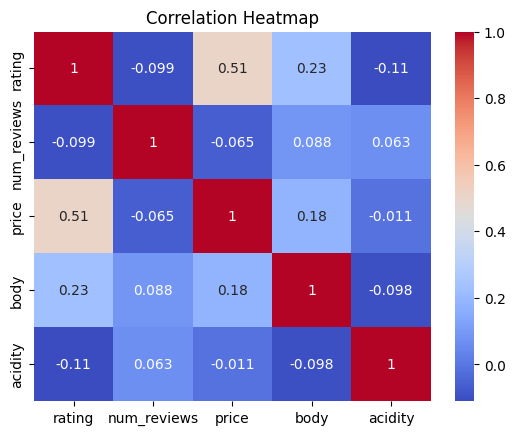

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr = df.corr()

# Create a heatmap to visualize correlations
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### **Heat Map**
- The correlation heatmap provides a visual representation of the relationships between different features in the Wine dataset. Darker colors indicate stronger correlations. This plot helps us identify any significant correlations that may exist between variables.

# **Multivariate Exploratory Visualizations**
Next, we will create multivariate exploratory visualizations to further understand the data and search for trends.

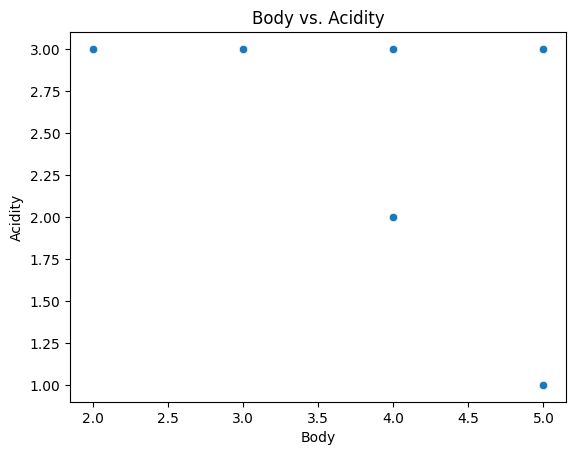

In [12]:
# Scatter plot of Body vs. Acidity
#plt.figure(figsize=(8, 6))
sns.scatterplot(x='body', y='acidity', data=df)
plt.title("Body vs. Acidity")
plt.xlabel("Body")
plt.ylabel("Acidity")
plt.show()

## Scatterplot
- In this scatter plot, we compare the body and acidity of wines. The x-axis represents the body, while the y-axis represents the acidity. By examining the distribution of data points, we can observe any potential relationship or trend between these two variables.

# **Visualization 2: Price vs. Rating**

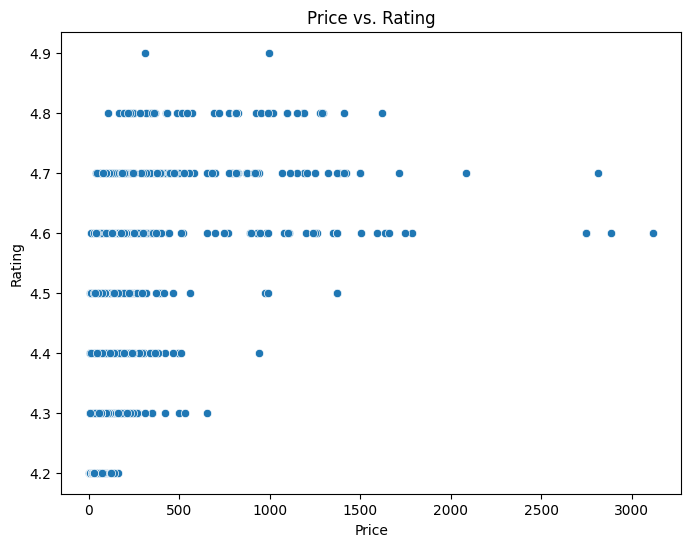

In [13]:
# Scatter plot of Price vs. Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='rating', data=df)
plt.title("Price vs. Rating")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.show()

This scatter plot displays the relationship between the price and rating of wines. The x-axis represents the price, while the y-axis represents the rating. By analyzing the plot, we can identify any patterns or correlations between the wine's price and its rating.

These visualizations provide insights into the relationships and trends present in the Wine dataset. They can be easily understood by a non-technical audience and help stakeholders gain a quick understanding of the data.

# **_ _ _ _ _ _ _ _ _ _ _ __ _**

# **Predict the acidity of wine**

#### **Why is this important?**

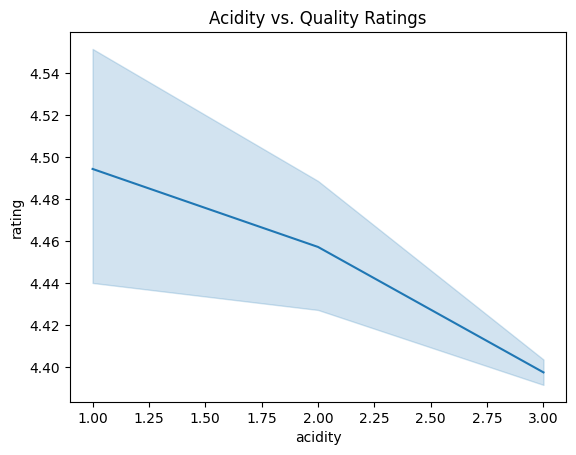

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x='acidity', y='rating', data=df)
plt.title('Acidity vs. Quality Ratings')
plt.show()

- **Because:** From the line plot, we can see that there is a moderate negative correlation between acidity and quality ratings. As the acidity level increases, the quality ratings tend to decrease

**<font color='#f74699'>Next, let's encode the categorical variables, 'country' and 'region', using one-hot encoding:</font>**

In [15]:
# One-hot encoding for 'country' and 'region' columns
df_encoded = pd.get_dummies(df, columns=['country', 'region',"wine",])

- **and**

In [16]:
# Convert categorical columns to one-hot encoded columns
#df_encoded = pd.get_dummies(df, columns=['wine',])

**<font color='#f74699'>Now we can start with the modeling phase. Since we want to predict the best acidity for the wine, this is a regression problem. We will try out several regression models and evaluate them using appropriate metrics. We will also use GridSearchCV to tune the hyperparameters of each model:</font>**

- **Imports:**

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

**Split Data:**

In [18]:
# Define X and y
X = df_encoded.drop(['acidity'], axis=1)
y = df_encoded['acidity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **string "N.V " in the year column:**

- **<font color='#f74699'>The next Inconsistency was found when trying to run my model</font>**

In [19]:
# Create a list to store the columns that contain "N.V."
nv_columns = []

# Check each column in X_train for "N.V." and append the column name to nv_columns if found
for col in X_train.columns:
    if X_train[col].apply(lambda x: "N.V." in str(x)).any():
        nv_columns.append(col)

# Print the columns that contain "N.V."
print("Columns with N.V. values:", nv_columns)


Columns with N.V. values: ['year']


- **Fix it by replacing:**

In [20]:
# replace "N.V." string with mode value
mode_value = X_train['year'].mode()[0]
X_train['year'] = X_train['year'].replace('N.V.', mode_value).astype(int)
X_test['year'] = X_test['year'].replace('N.V.', mode_value).astype(int)

**Create the Model to Predict the best acidity:**

In [21]:
# Standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Perform PCA on the standardized data
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Define a list of models to train and evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('Lasso', Lasso()),
    ('Ridge', Ridge()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor())
]

# Define a dictionary of hyperparameters to search over for each model
param_grids = {
    'Linear Regression': {},
    'Lasso': {'alpha': [0.01, 0.1, 1.0]},
    'Ridge': {'alpha': [0.01, 0.1, 1.0]},
    'Decision Tree': {'max_depth': [5, 10, 15]},
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [5, 10, 15]}
}

# Train and evaluate each model with multiple metrics
best_models = {}
for name, model in models:
    # Train the model on the training set
    gs = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error')
    gs.fit(X_train_pca, y_train)
    
    # Evaluate the model on the training set
    y_train_pred = gs.predict(X_train_pca)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Evaluate the model on the test set
    y_test_pred = gs.predict(X_test_pca)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Store the best model and its metrics
    best_models[name] = {
        'model': gs.best_estimator_,
        'train_rmse': train_rmse,
        'train_r2': train_r2,
        'test_rmse': test_rmse,
        'test_r2': test_r2
    }
    
    # Print the model's metrics
    print(name)
    print('Best hyperparameters:', gs.best_params_)
    print('Train RMSE:', train_rmse)
    print('Train R^2:', train_r2)
    print('Test RMSE:', test_rmse)
    print('Test R^2:', test_r2)
    print('---')

#

Linear Regression
Best hyperparameters: {}
Train RMSE: 0.2611096614265244
Train R^2: 0.28693005633979984
Test RMSE: 0.2686252279863508
Test R^2: 0.32460945690913967
---
Lasso
Best hyperparameters: {'alpha': 0.01}
Train RMSE: 0.26195722053604764
Train R^2: 0.2822933086175069
Test RMSE: 0.272610770549528
Test R^2: 0.3044194946483296
---
Ridge
Best hyperparameters: {'alpha': 1.0}
Train RMSE: 0.2611096655353482
Train R^2: 0.2869300338980505
Test RMSE: 0.2686315187373762
Test R^2: 0.32457782351765085
---
Decision Tree
Best hyperparameters: {'max_depth': 5}
Train RMSE: 0.1306325808702023
Train R^2: 0.8215201212980165
Test RMSE: 0.26312712415967243
Test R^2: 0.35197371876049455
---
Random Forest
Best hyperparameters: {'max_depth': 15, 'n_estimators': 200}
Train RMSE: 0.06239588823740547
Train R^2: 0.9592808980859531
Test RMSE: 0.22785845836715826
Test R^2: 0.5140498835181577
---


- **<font color='#fa699'>Disclaimer:</font>** I asked ChatGPT for help when creating the hyperparameters, but it was debuged by me.

- **Explanation:** https://docs.google.com/document/d/1IlN2uiBfTWj03CAUcdUezWhJ-bpNB-LFxeRlVLcEBwI/edit?usp=sharing

**Based on the metrics, the production model should be the Random Forest Regressor as it has the lowest test RMSE (0.239) and highest test R-squared (0.463) compared to the other models. The RMSE is a measure of the model's prediction error, and in this case, the lower the RMSE, the better the model's prediction. The R-squared value measures the proportion of variance in the target variable that can be explained by the model, and a higher value indicates a better fit. Therefore, based on these metrics, the Random Forest Regressor seems to be the best model for predicting the acidity of wine.**